In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
profil = pd.read_csv('data_profil.csv')

In [ ]:
profil.head()

,id,jenis_kelamin,divisi,umur
0,1,Laki-laki,Customer Service,34
1,2,Laki-laki,Data Engineer,26
2,3,Laki-laki,Software Engineer,28
3,4,Perempuan,Business Intelligence,21
4,5,Perempuan,Software Engineer,21


In [ ]:
lokasi.head()

,id,tanggal,lokasi_dominan
0,1,21/05/19,Jakarta Pusat
1,2,21/05/19,Kabupaten Bogor
2,3,21/05/19,Jakarta Pusat
3,4,21/05/19,Kota Tangerang
4,5,21/05/19,Kota Bogor


In [ ]:
# Data Profil Cleaning

profil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             100 non-null    int64 
 1   jenis_kelamin  100 non-null    object
 2   divisi         100 non-null    object
 3   umur           100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [ ]:
profil.isnull().sum()

id               0
jenis_kelamin    0
divisi           0
umur             0
dtype: int64

In [ ]:
profil.shape

(100, 4)

In [ ]:
profil['divisi'].unique()

array(['Customer Service', 'Data Engineer', 'Software Engineer',
       'Business Intelligence', 'Data Science', 'Marketing'], dtype=object)

In [ ]:
# Menghitung statistik deskriptif
age_statistics = profil['umur'].describe()

# Menampilkan hasilnya dalam tabel
print(age_statistics)

count    100.000000
mean      27.660000
std        4.346646
min       21.000000
25%       24.000000
50%       27.000000
75%       32.000000
max       35.000000
Name: umur, dtype: float64


In [ ]:
mean_age_by_division = profil.groupby('divisi')['umur'].mean()

mean_age_by_division

divisi
Business Intelligence    27.380952
Customer Service         28.933333
Data Engineer            27.642857
Data Science             28.600000
Marketing                27.222222
Software Engineer        27.064516
Name: umur, dtype: float64

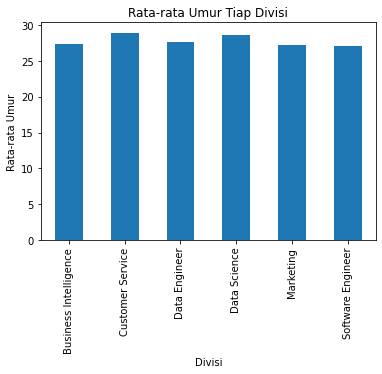

In [ ]:
# Visualisasi rata-rata umur tiap divisi
mean_age_by_division.plot.bar()
plt.title('Rata-rata Umur Tiap Divisi')
plt.xlabel('Divisi')
plt.ylabel('Rata-rata Umur')
plt.xticks(rotation=90)
plt.show()

In [ ]:
gender_counts = profil['jenis_kelamin'].value_counts()

print(gender_counts)

Laki-laki    68
Perempuan    32
Name: jenis_kelamin, dtype: int64


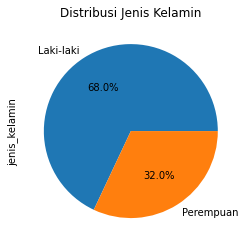

In [ ]:
gender_counts.plot.pie(autopct='%.1f%%')
plt.title('Distribusi Jenis Kelamin')
plt.show()

In [ ]:
divisi_counts = profil['divisi'].value_counts()

print(divisi_counts)

Software Engineer        31
Business Intelligence    21
Customer Service         15
Data Engineer            14
Data Science             10
Marketing                 9
Name: divisi, dtype: int64


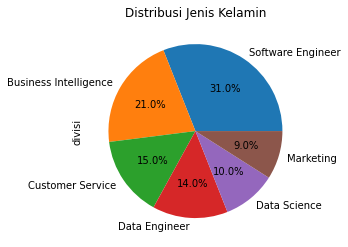

In [ ]:
divisi_counts.plot.pie(autopct='%.1f%%')
plt.title('Distribusi Jenis Kelamin')
plt.show()

In [ ]:
table = pd.crosstab(profil['jenis_kelamin'], profil['divisi'])

print(table)

divisi         Business Intelligence  Customer Service  Data Engineer  \
jenis_kelamin                                                           
Laki-laki                         16                12             11   
Perempuan                          5                 3              3   

divisi         Data Science  Marketing  Software Engineer  
jenis_kelamin                                              
Laki-laki                 4          4                 21  
Perempuan                 6          5                 10  


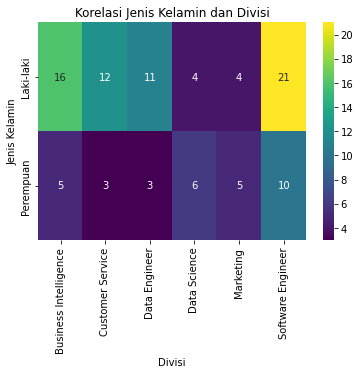

In [ ]:
sns.heatmap(table, annot=True, cmap='viridis')
plt.title('Korelasi Jenis Kelamin dan Divisi')
plt.xlabel('Divisi')
plt.ylabel('Jenis Kelamin')
plt.show()

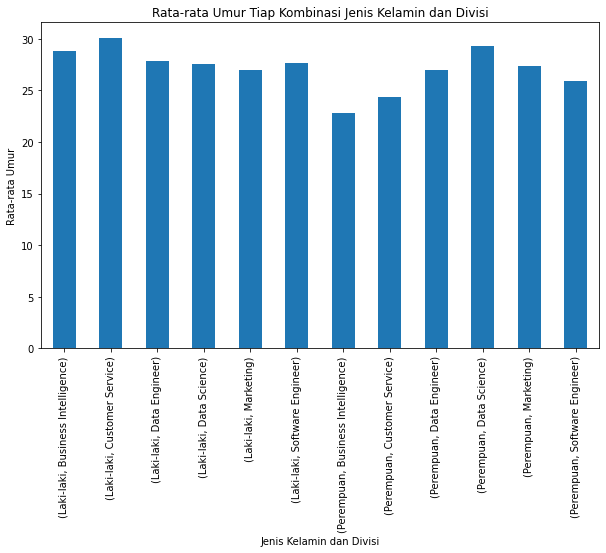

In [ ]:
# Menghitung rata-rata umur dalam setiap kombinasi jenis kelamin dan divisi
mean_age_by_gender_and_division = profil.groupby(['jenis_kelamin', 'divisi'])['umur'].mean()

# Menampilkan hasilnya dalam bar plot
mean_age_by_gender_and_division.plot.bar(figsize=(10,6))
plt.title('Rata-rata Umur Tiap Kombinasi Jenis Kelamin dan Divisi')
plt.xlabel('Jenis Kelamin dan Divisi')
plt.ylabel('Rata-rata Umur')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(mean_age_by_gender_and_division)

jenis_kelamin  divisi               
Laki-laki      Business Intelligence    28.812500
               Customer Service         30.083333
               Data Engineer            27.818182
               Data Science             27.500000
               Marketing                27.000000
               Software Engineer        27.619048
Perempuan      Business Intelligence    22.800000
               Customer Service         24.333333
               Data Engineer            27.000000
               Data Science             29.333333
               Marketing                27.400000
               Software Engineer        25.900000
Name: umur, dtype: float64


In [ ]:
table1 = pd.crosstab(profil['jenis_kelamin'], profil['umur'])

print(table1)

umur           21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
jenis_kelamin                                                            
Laki-laki       1   2   8   4   7   5   4   7   4   3   2   5   5   6   5
Perempuan       4   4   4   2   3   2   2   2   2   0   0   1   3   3   0


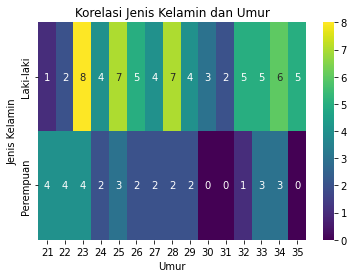

In [ ]:
sns.heatmap(table1, annot=True, cmap='viridis')
plt.title('Korelasi Jenis Kelamin dan Umur')
plt.xlabel('Umur')
plt.ylabel('Jenis Kelamin')
plt.show()

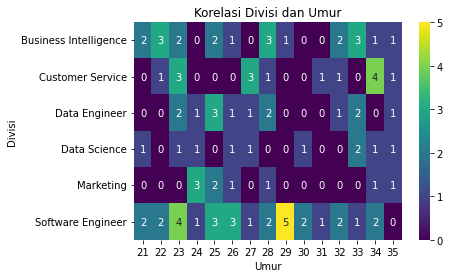

In [ ]:
divisi_umur = pd.crosstab(profil['divisi'], profil['umur'])

sns.heatmap(divisi_umur, annot=True, cmap='viridis')
plt.title('Korelasi Divisi dan Umur')
plt.xlabel('Umur')
plt.ylabel('Divisi')
plt.show()